In [61]:
import scipy.io
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
# load our dataset
train_data = scipy.io.loadmat('train_32x32.mat')

# Uncomment below to use a larger data set to work on, but will take longer to run
#train_data = scipy.io.loadmat('extra_32x32.mat')

In [229]:
# extract the images and labels from the dictionary object
X = train_data['X']
y = train_data['y']


In [255]:
# view an image (e.g. 25) and print its corresponding label
img_index = 3
plt.imshow(X[:,:,:,img_index])
plt.show()
print(y[img_index])

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

In [230]:
# Reshape X so it is correct dimension
X = X.reshape(X.shape[0]*X.shape[1]*X.shape[2],-1)
X = X.transpose()
y = y.reshape(-1,)
# Split data into train dev and test data sets

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_dev, X_test, y_dev, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state= 42)

We have created a training data set which we will use to train our model so that we can start making predicitions. We will then try and improving the model by testing it against the dev data set. When we are finally happy with our model we will then use the test data set to test the accuracy of the model with brand new data that hasnt already been used

We will now create a random forest classifier, we will do so using the default values 

In [231]:
# Create random forest model
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

# Make predictions and get an accuracy score
preds = forest.predict(X_dev)
acc = accuracy_score(y_dev,preds)

print("Accuracy:", acc)


Accuracy: 0.7050343999126352


We have achieved an accuracy of 0.7, which is pretty good we will now try to improve it by tuning some of the parameters in the random forest classifier. I will be tuning the n_estimators parameter which represents the number of trees in the forest, the default value was 100

In [243]:
# Store scores in a vector
scores = []
scores.append(acc)
# Parameters to attempt
estimators = [100,150,200,250]

for i in range(1,4):
    forest = RandomForestClassifier(n_estimators=estimators[i], random_state=42)
    forest.fit(X_train,y_train)
    preds = forest.predict(X_dev)
    acc = accuracy_score(y_dev,preds)
    scores.append(acc)
    

Text(0, 0.5, 'Accuracy')

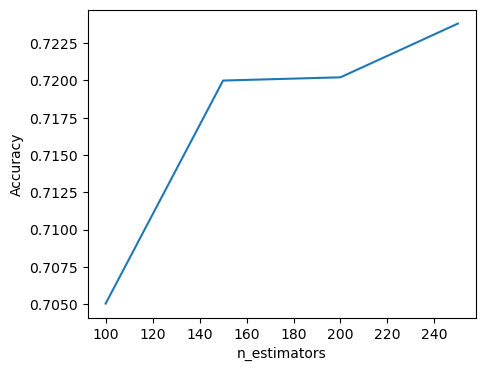

In [254]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(5,4))
sns.lineplot(x=estimators, y=scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')


Here we can see that we have achieved the greatest accuracy when using n_estimators = 250

We will now create a confusion matrix using the unused X_test and y_test data and see how our model performs

              precision    recall  f1-score   support

           1       0.64      0.93      0.76      1748
           2       0.72      0.87      0.79      1302
           3       0.68      0.70      0.69      1013
           4       0.76      0.78      0.77       918
           5       0.74      0.67      0.70       823
           6       0.74      0.61      0.67       736
           7       0.90      0.63      0.74       703
           8       0.84      0.48      0.61       680
           9       0.87      0.52      0.65       611
          10       0.81      0.61      0.70       624

    accuracy                           0.72      9158
   macro avg       0.77      0.68      0.71      9158
weighted avg       0.75      0.72      0.72      9158



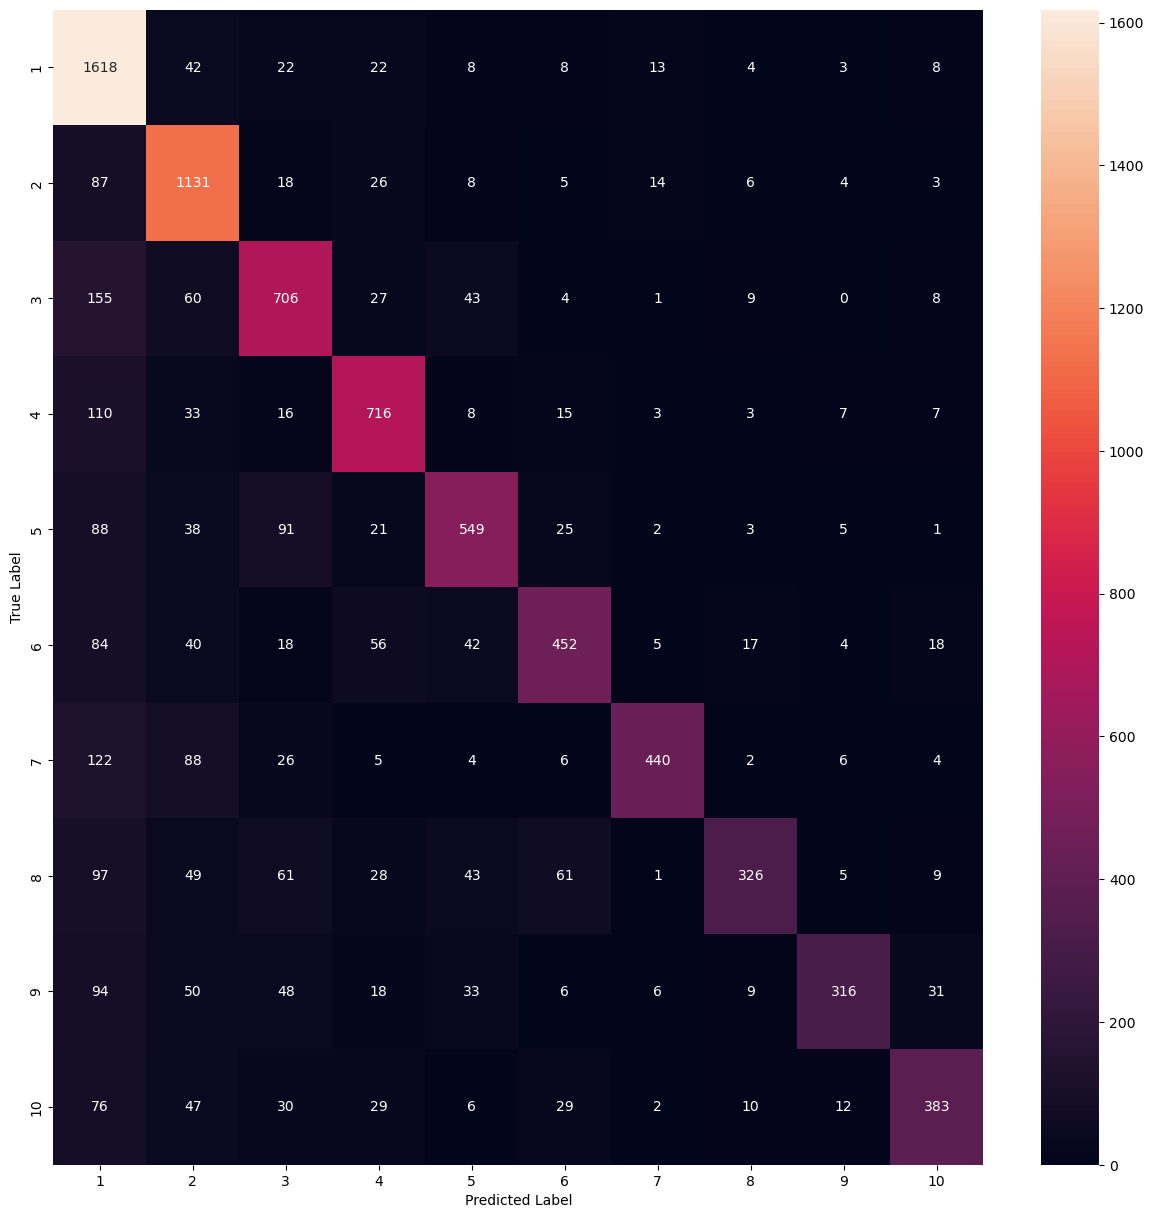

In [246]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions using test data
preds = forest.predict(X_test)


# Plot confusiom matrix
labels= (1,2,3,4,5,6,7,8,9,10)
cm = confusion_matrix(y_test, preds)
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set(ylabel="True Label", xlabel="Predicted Label")

# Create classification report
print(classification_report(y_test,preds))

From this we can see that the class that the model struggled the most with was 1, with it having the lowest precision score, it does have a high recall score which means it was able to succesfully recognise the majority of images that had a 1 correctly but the issue that model struggled with is that it produced a high number of false positives so was predicting a 1 when the image didnt contain a 1.

Overall the model has:  
    precision - 0.75  
    recall - 0.72  
    f1-score - 0.72  